<a href="https://colab.research.google.com/github/Ankitajadhav611/TensorFlow_prac/blob/master/TextClassification(Kaggle_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import json
token = {'username': 'username', 'key': 'some_alphabets'}         #use your API for kaggle
with open('/content/.kaggle/kaggle.json','w') as file:
  json.dump(token,file)


In [10]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [11]:
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


In [12]:
!chmod 600 /root/.kaggle/kaggle.json


In [13]:
!kaggle datasets list -s SMS


ref                                                      title                                             size  lastUpdated          downloadCount  
-------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
uciml/sms-spam-collection-dataset                        SMS Spam Collection Dataset                      211KB  2016-12-02 19:29:17          56366  
marcodena/mobile-phone-activity                          Mobile phone activity in a city                  242MB  2019-11-14 06:11:32           9224  
shravan3273/sms-spam                                     Sms spam                                         207KB  2018-02-27 05:42:28            570  
rtatman/the-national-university-of-singapore-sms-corpus  The National University of Singapore SMS Corpus    4MB  2017-08-07 18:51:58           1952  
truocpham/smsspamcollection                              smsspamcollection                          

In [14]:
!kaggle datasets download -d lampubhutia/email-spam-ham-prediction -p/content

  0% 0.00/209k [00:00<?, ?B/s]
100% 209k/209k [00:00<00:00, 81.8MB/s]


In [15]:
!unzip \*.zip

Archive:  email-spam-ham-prediction.zip
  inflating: sms_spam.csv            


In [39]:
#data preprocessing
import pandas as pd
dataset = pd.read_csv('sms_spam.csv')

ts = pd.get_dummies(dataset['type'],drop_first = True)
dataset = pd.concat([dataset,ts],axis=1)
X = dataset['text']
Y = dataset['spam']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 101)
vocab_size = 10000
oov_tok = "<OOV>"
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq,maxlen = max_length, padding =padding_type,truncating = trunc_type)

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq, maxlen=max_length, padding=padding_type, truncating = trunc_type)




In [40]:
#converting the list into numpy array 
import numpy as np
train_padded = np.array(train_padded)
train_label = np.array(Y_train)
test_padded = np.array(test_padded)
test_label = np.array(Y_test)

#creating a n nlp model
model = tensorflow.keras.Sequential([
                                     tensorflow.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                                     tensorflow.keras.layers.AveragePooling1D(),
                                     tensorflow.keras.layers.Dense(24,activation='relu'),
                                     tensorflow.keras.layers.Dense(1,activation='sigmoid')

])
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
average_pooling1d_2 (Average (None, 50, 16)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 50, 24)            408       
_________________________________________________________________
dense_5 (Dense)              (None, 50, 1)             25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [41]:
num_epochs = 30
history = model.fit(train_padded,train_label,epochs=num_epochs,validation_data=(test_padded,test_label),verbose=2)


Epoch 1/30
140/140 - 1s - loss: 0.4864 - accuracy: 0.8638 - val_loss: 0.3485 - val_accuracy: 0.8875
Epoch 2/30
140/140 - 1s - loss: 0.3691 - accuracy: 0.8784 - val_loss: 0.3355 - val_accuracy: 0.8949
Epoch 3/30
140/140 - 1s - loss: 0.3564 - accuracy: 0.8835 - val_loss: 0.3308 - val_accuracy: 0.8953
Epoch 4/30
140/140 - 1s - loss: 0.3504 - accuracy: 0.8853 - val_loss: 0.3285 - val_accuracy: 0.8956
Epoch 5/30
140/140 - 1s - loss: 0.3459 - accuracy: 0.8863 - val_loss: 0.3260 - val_accuracy: 0.8957
Epoch 6/30
140/140 - 1s - loss: 0.3434 - accuracy: 0.8871 - val_loss: 0.3247 - val_accuracy: 0.8958
Epoch 7/30
140/140 - 1s - loss: 0.3417 - accuracy: 0.8876 - val_loss: 0.3252 - val_accuracy: 0.8960
Epoch 8/30
140/140 - 1s - loss: 0.3407 - accuracy: 0.8879 - val_loss: 0.3250 - val_accuracy: 0.8955
Epoch 9/30
140/140 - 1s - loss: 0.3397 - accuracy: 0.8879 - val_loss: 0.3248 - val_accuracy: 0.8954
Epoch 10/30
140/140 - 1s - loss: 0.3391 - accuracy: 0.8880 - val_loss: 0.3245 - val_accuracy: 0.8957

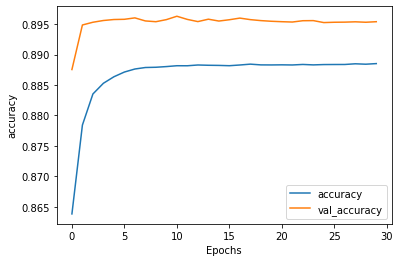

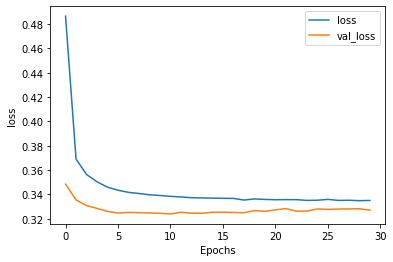

In [42]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')
